# Apache PySpark by Example

**[June 2023 update]**

I've consolidated all the notebooks for this course into a single notebook. (The course videos will still show individual notebooks)


## Introduction to Google Colab

### Jupyter notebook basics

#### Code cells

#### Text cells

### Access to the shell

## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [3]:
!pip install pyspark==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317123 sha256=77a97ede2d6f5a8c418f9e604a31d91ab1589c6f13e33dbcdc660ac5c26acec8
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [5]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2023-12-30 15:57:22--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]   1.75G  3.03MB/s    in 10m 23s 

2023-12-30 16:07:46 (2.88 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1881340404]

total 1837256
-rw-r--r-- 1 root root 1881340404 Dec 30 11:57 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 Dec 19 14:20  sample_data


In [6]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1837256
-rw-r--r-- 1 root root 1881340404 Dec 30 11:57 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Dec 19 14:20 sample_data


In [7]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [8]:
!ls

reported-crimes.csv  sample_data


## (03-03) Schemas

## (03-04) Working with columns

**Display only the first 5 rows of the column name IUCR**

  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

**Add a column with name One, with entries all 1s**

**Remove the column IUCR**

## (03-05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

## (03-06) Challenge

**What percentage of reported crimes resulted in an arrest?**

  **What are the top 3 locations for reported crimes?**

## (04-01) Built-in functions

In [ ]:
from pyspark.sql import functions

In [ ]:
print(dir(functions))

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

### Numeric functions


**Show the oldest date and the most recent date**

### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

## (04-02) Working with dates

  **2019-12-25 13:30:00**

**25/Dec/2019 13:30:00**

**12/25/2019 01:30:00 PM**

## (04-03) Joins

**Download police station data**

In [7]:
!wget -O police-station.csv https://data.cityofchicago.org/resource/z8bn-74gv.csv

--2023-12-30 13:54:28--  https://data.cityofchicago.org/resource/z8bn-74gv.csv
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   6.22K  --.-KB/s    in 0s      

2023-12-30 13:54:29 (1.69 GB/s) - ‘police-station.csv’ saved [6365]

total 1837272
-rw-r--r-- 1 root root       6365 Aug 19  2019 police-station.csv
-rw-r--r-- 1 root root 1881340404 Dec 30 11:57 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Dec 19 14:20 sample_data
-rw-r--r-- 1 root root       6365 Aug 19  2019 z8bn-74gv.csv


In [13]:
ps=spark.read.csv('police-station.csv', header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [14]:
rc.cache()
rc.count()

6756820

In [15]:
ps.select(col('DISTRICT')).distinct().show(30)

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
| ","Chicago"|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
|          12|
|          14|
|           2|
+------------+



In [16]:
rc.select(col('DISTRICT')).distinct().show(30)

+--------+
|DISTRICT|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|     021|
|    null|
+--------+



**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [17]:
from pyspark.sql.functions import lpad

In [19]:
ps.select(lpad('DISTRICT',3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ","|
+--------------------+
only showing top 20 rows



In [20]:
ps=ps.withColumn('Format_district',lpad('DISTRICT',3,'0'))
ps.show()

+------------+--------------+--------------------+--------------------+------------+------------+--------------------+------------+------------+------------+------------+--------------------+-----------+------------+--------------------+---------------+
|    district| district_name|             address|                city|       state|         zip|             website|       phone|         fax|         tty|x_coordinate|        y_coordinate|   latitude|   longitude|            location|Format_district|
+------------+--------------+--------------------+--------------------+------------+------------+--------------------+------------+------------+------------+------------+--------------------+-----------+------------+--------------------+---------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|             Chicago|          IL|       60653|http://home.chica...|        null|        null|        null| 1177731.401|         1881697.404|41.83070169|-87.62339535|(41.8307016873, -...| 

In [25]:
rc.join(ps,rc.District == ps.Format_district, "left_outer").drop('address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|district|district_name|Format_district|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+-------------+---------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|  

In [22]:
ps.columns

['district',
 'district_name',
 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location',
 'Format_district']

## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [9]:
from pyspark.sql.functions import date_format
import matplotlib.pyplot as plt


Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Parameters
    ----------
    date : :class:`~pyspark.sql.Column` or str
        input column of values to format.
    format: str
        format to use to represent datetime values.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        string value repres

In [13]:
from pyspark.sql.functions import dayofweek
#Best to use specialized function
rc=rc.withColumns({'dow_number' : dayofweek('Date'), 'dow_string' : date_format('Date','E')})

In [19]:
rc.select('ID','Date','dow_number','dow_string').show(3)

+--------+-------------------+----------+----------+
|      ID|               Date|dow_number|dow_string|
+--------+-------------------+----------+----------+
| 5741943|2007-08-25 09:22:18|         7|       Sat|
| 1930689|2002-01-05 21:24:00|         7|       Sat|
|12416974|2011-08-10 00:01:00|         4|       Wed|
+--------+-------------------+----------+----------+
only showing top 3 rows



In [20]:
data_dow=rc.select('ID','Date','dow_number','dow_string').groupBy('dow_number').count().orderBy('dow_number')

In [21]:
data_dow.show()

+----------+-------+
|dow_number|  count|
+----------+-------+
|         1| 912453|
|         2| 953249|
|         3| 968546|
|         4| 974383|
|         5| 965116|
|         6|1017476|
|         7| 965597|
+----------+-------+



In [33]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = [int(row['dow_number']) for row in data_dow.collect()]
y = [int(row['count']) for row in data_dow.collect()]

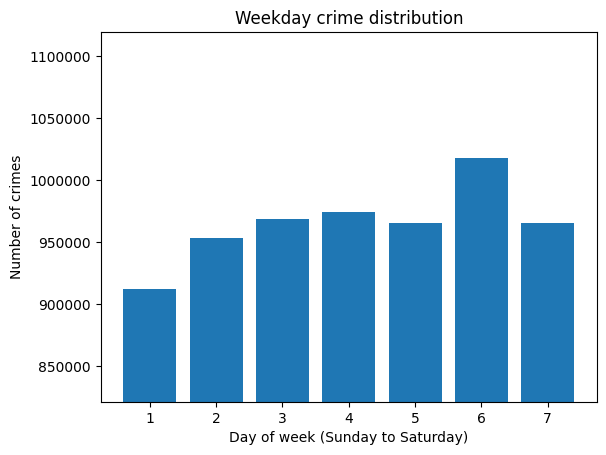

In [39]:
plt.bar(x,y)
plt.xlabel("Day of week (Sunday to Saturday)")
plt.ylabel("Number of crimes")
plt.title("Weekday crime distribution")
plt.ticklabel_format(style='plain')
plt.ylim(ymin=0.9*min(y), ymax=1.1*max(y))
plt.show()

## (05-01) RDDs setup

**How many police stations are there?**

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**